In [2]:
#Importing Libraries
import numpy as np#for Data Analysis
import pandas as pd#for scientific computation
import matplotlib.pyplot as plt#for data visualization
import seaborn as sns#for data viualization
from sklearn.model_selection import train_test_split#importing train test split from sklearn.model_selection
from sklearn.linear_model import LinearRegression#importing Linear Regression
from sklearn.linear_model import Lasso#importing Lasso
from sklearn import metrics#importing metrics

In [3]:
#read the data from csv file
df=pd.read_csv(r"F:ucar2.csv")

In [4]:
#checking the first five rows
df.head()

,Brand,fueltype,mileage,model,price,transmission,variant,year
0,Audi,Diesel,70500,A4,2650000,Automatic,35 TDI Premium + Sunroof,2015
1,Audi,Diesel,0,A6,2295000,0,0,2018
2,Audi,Diesel,0,Q3,530000,0,0,2016
3,BMW,Diesel,0,3 Series,32000,0,2.5 GX (Diesel) 8 Seater BS IV,2013
4,BMW,Diesel,30808,3 Series,140999,Manual,2.5 GX (Diesel) 8 Seater,2014


In [5]:
#checking the last five rows
df.tail()

,Brand,fueltype,mileage,model,price,transmission,variant,year
194,Volkswagen,Diesel,0,Vento,500000,0,0,2011
195,Volkswagen,Diesel,0,Vento,345000,0,V,2013
196,Volkswagen,Petrol,0,Ameo,625000,0,2002-2013 SLE BS IV,2018
197,Volkswagen,Petrol,0,Polo,410000,0,0,4036
198,Volkswagen,Petrol,0,Polo,420000,0,Others,2014


In [6]:
#checking the dtypes of dataset
df.dtypes

Brand           object
fueltype        object
mileage          int64
model           object
price            int64
transmission    object
variant         object
year             int64
dtype: object

In [7]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         199 non-null    object
 1   fueltype      199 non-null    object
 2   mileage       199 non-null    int64 
 3   model         199 non-null    object
 4   price         199 non-null    int64 
 5   transmission  199 non-null    object
 6   variant       199 non-null    object
 7   year          199 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


In [8]:
#checking how many columns present in dataset
df.columns

Index(['Brand', 'fueltype', 'mileage', 'model', 'price', 'transmission',
       'variant', 'year'],
      dtype='object')

In [9]:
#checking the missing value
df.isnull().sum()

Brand           0
fueltype        0
mileage         0
model           0
price           0
transmission    0
variant         0
year            0
dtype: int64

In [82]:
#checking the distribution of the Categorical columns

In [11]:

df.fueltype.value_counts()


Diesel           72
0                71
Petrol           54
CNG & Hybrids     2
Name: fueltype, dtype: int64

In [12]:
df.transmission.value_counts()

0            106
Manual        70
Automatic     23
Name: transmission, dtype: int64

In [13]:
df.model.value_counts()


0              71
Swift Dzire     6
Grand i10       6
i20             5
Ertiga          4
               ..
Kicks           1
Figo Aspire     1
Jazz            1
Etios Cross     1
Q3              1
Name: model, Length: 72, dtype: int64

In [14]:
df.Brand.value_counts()

NO rating        71
Maruti Suzuki    29
Hyundai          27
Ford              8
BMW               8
Toyota            8
Mahindra          8
Volkswagen        6
Mercedes-Benz     6
Tata              5
Renault           5
Honda             5
Audi              3
Fiat              2
Land Rover        2
Chevrolet         2
Nissan            1
Skoda             1
Mitsubishi        1
Kia               1
Name: Brand, dtype: int64

In [4]:
#checking the shape od the dataset
df.shape

(199, 8)

In [7]:
#checking the distribution of categorical data
print(df.fueltype.value_counts())
print(df.model.value_counts())
print(df.transmission.value_counts())

Diesel           72
0                71
Petrol           54
CNG & Hybrids     2
Name: fueltype, dtype: int64
0              71
Grand i10       6
Swift Dzire     6
i20             5
Ertiga          4
               ..
A6              1
Indica V2       1
Rexton          1
A4              1
Q3              1
Name: model, Length: 72, dtype: int64
0            106
Manual        70
Automatic     23
Name: transmission, dtype: int64


In [15]:
#1. Checking the Missing Values

missing_value=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [16]:
missing_value

[]

In [18]:
#Checking the number of numerical features
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!="O"]

In [19]:
df[numerical_feature]

,mileage,price,year
0,70500,2650000,2015
1,0,2295000,2018
2,0,530000,2016
3,0,32000,2013
4,30808,140999,2014
...,...,...,...
194,0,500000,2011
195,0,345000,2013
196,0,625000,2018
197,0,410000,4036


In [20]:
print('Number of numerical variables', len(numerical_feature))

Number of numerical variables 3


In [21]:
#checking the number of unique values present in numerical column

print("Number of unique values in numeric column:", df['price'].nunique())
print("The unique value in the numerical column: \n",df['price'].unique())

Number of unique values in numeric column: 154
The unique value in the numerical column: 
 [ 2650000  2295000   530000    32000   140999   400000   355000   640000
  1845000  1025000   599000   199999   225000   265000   499599   285000
   250000   841000   300000   275000   860000  3450000   560000  1021000
  1735000  2241000   824000   800000   361000   710000  1600000   396000
  1075000  4650000   590000   484000   385000   675000  5200000   215000
   470000    40000  1530000   145000   535000  1300000  1100000   780000
   450000  1750000   199000   980000  3700000  1900000   245000   750000
   120000   550000   375000  1350000  1709999   161000   420000   990000
   545000   525000   820000   730000   350000   865000   340000   330000
   561000    35000   415000   380000    95000   660000   655555   575000
   490000   570000   440000   495000  1650000  1397000   251000   211000
   125000  1050000   625000 26510297   210000   200000   465000   425000
   320000  4900000   155000  2250

In [22]:
#checking the categorical feature
discrete_feature=[feature for feature in df.columns if feature not in numerical_feature]

In [23]:
df[discrete_feature]

,Brand,fueltype,model,transmission,variant
0,Audi,Diesel,A4,Automatic,35 TDI Premium + Sunroof
1,Audi,Diesel,A6,0,0
2,Audi,Diesel,Q3,0,0
3,BMW,Diesel,3 Series,0,2.5 GX (Diesel) 8 Seater BS IV
4,BMW,Diesel,3 Series,Manual,2.5 GX (Diesel) 8 Seater
...,...,...,...,...,...
194,Volkswagen,Diesel,Vento,0,0
195,Volkswagen,Diesel,Vento,0,V
196,Volkswagen,Petrol,Ameo,0,2002-2013 SLE BS IV
197,Volkswagen,Petrol,Polo,0,0


In [24]:
print("Count of discrete columns:", len(discrete_feature))

Count of discrete columns: 5


NO rating        71
Maruti Suzuki    29
Hyundai          27
Ford              8
BMW               8
Toyota            8
Mahindra          8
Volkswagen        6
Mercedes-Benz     6
Tata              5
Renault           5
Honda             5
Audi              3
Fiat              2
Land Rover        2
Chevrolet         2
Nissan            1
Skoda             1
Mitsubishi        1
Kia               1
Name: Brand, dtype: int64
----------------------------------------------------------------------


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Brand', ylabel='count'>

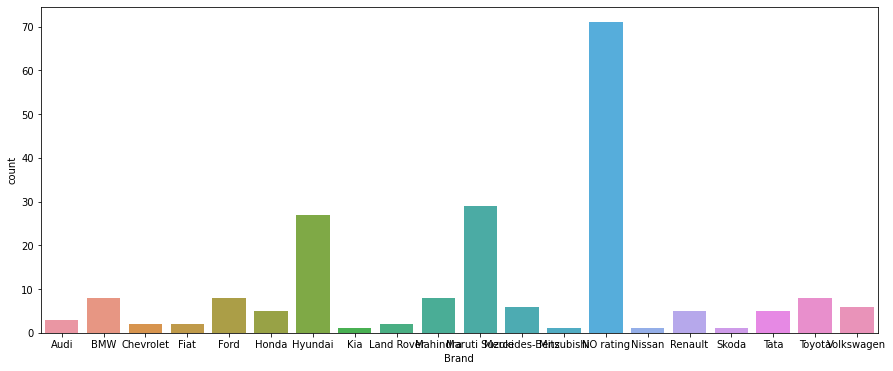

In [25]:
plt.figure(figsize=(15,6))
print(df['Brand'].value_counts())
print("-"*70)
sns.countplot(df['Brand'].sort_values())

Diesel           72
0                71
Petrol           54
CNG & Hybrids     2
Name: fueltype, dtype: int64
----------------------------------------------------------------------


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fueltype', ylabel='count'>

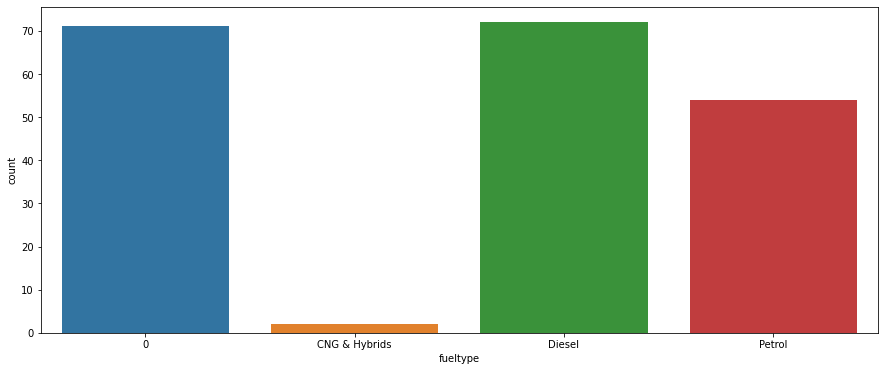

In [26]:
plt.figure(figsize=(15,6))
print(df['fueltype'].value_counts())
print("-"*70)
sns.countplot(df['fueltype'].sort_values())

0              71
Swift Dzire     6
Grand i10       6
i20             5
Ertiga          4
               ..
Kicks           1
Figo Aspire     1
Jazz            1
Etios Cross     1
Q3              1
Name: model, Length: 72, dtype: int64
----------------------------------------------------------------------


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='model', ylabel='count'>

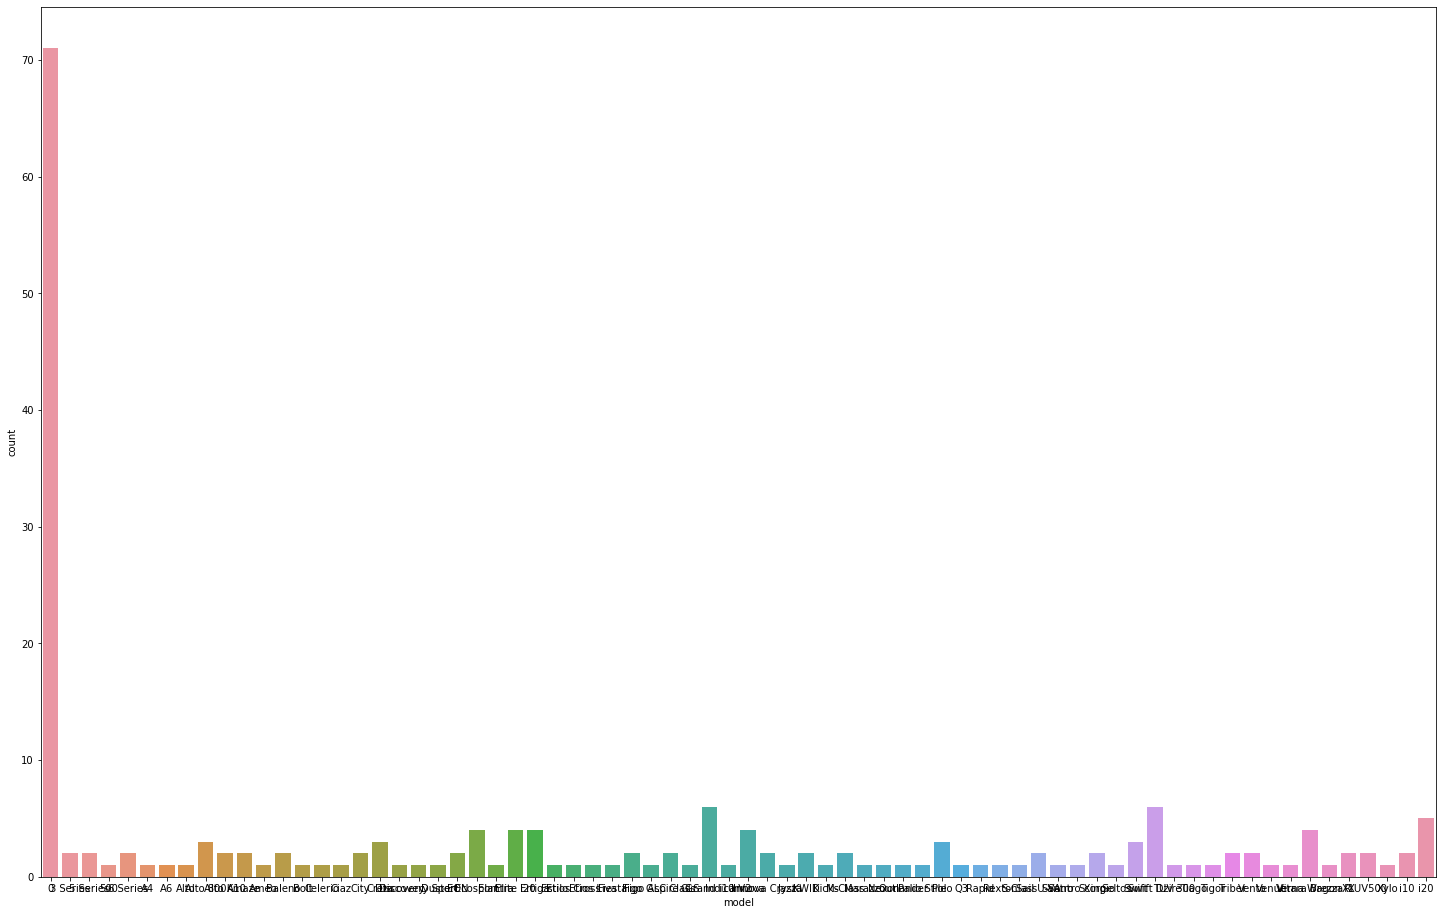

In [27]:
plt.figure(figsize=(25,16))
print(df['model'].value_counts())
print("-"*70)
sns.countplot(df['model'].sort_values())

0            106
Manual        70
Automatic     23
Name: transmission, dtype: int64
----------------------------------------------------------------------


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='count'>

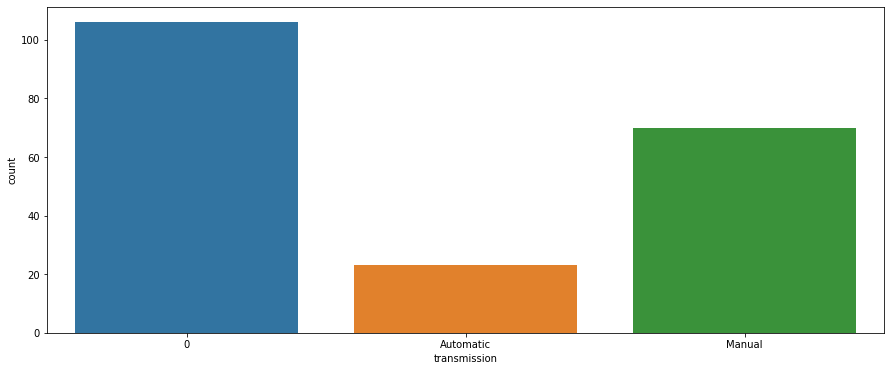

In [28]:
plt.figure(figsize=(15,6))
print(df['transmission'].value_counts())
print("-"*70)
sns.countplot(df['transmission'].sort_values())

0                    70
LXI                   4
ZDI                   4
Others                4
VXI                   4
                     ..
SD4 HSE Luxury 7S     1
110PS Diesel RxZ      1
43 AMG Coupe          1
2.5 V 7 STR           1
Sportz                1
Name: variant, Length: 109, dtype: int64
----------------------------------------------------------------------


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='variant', ylabel='count'>

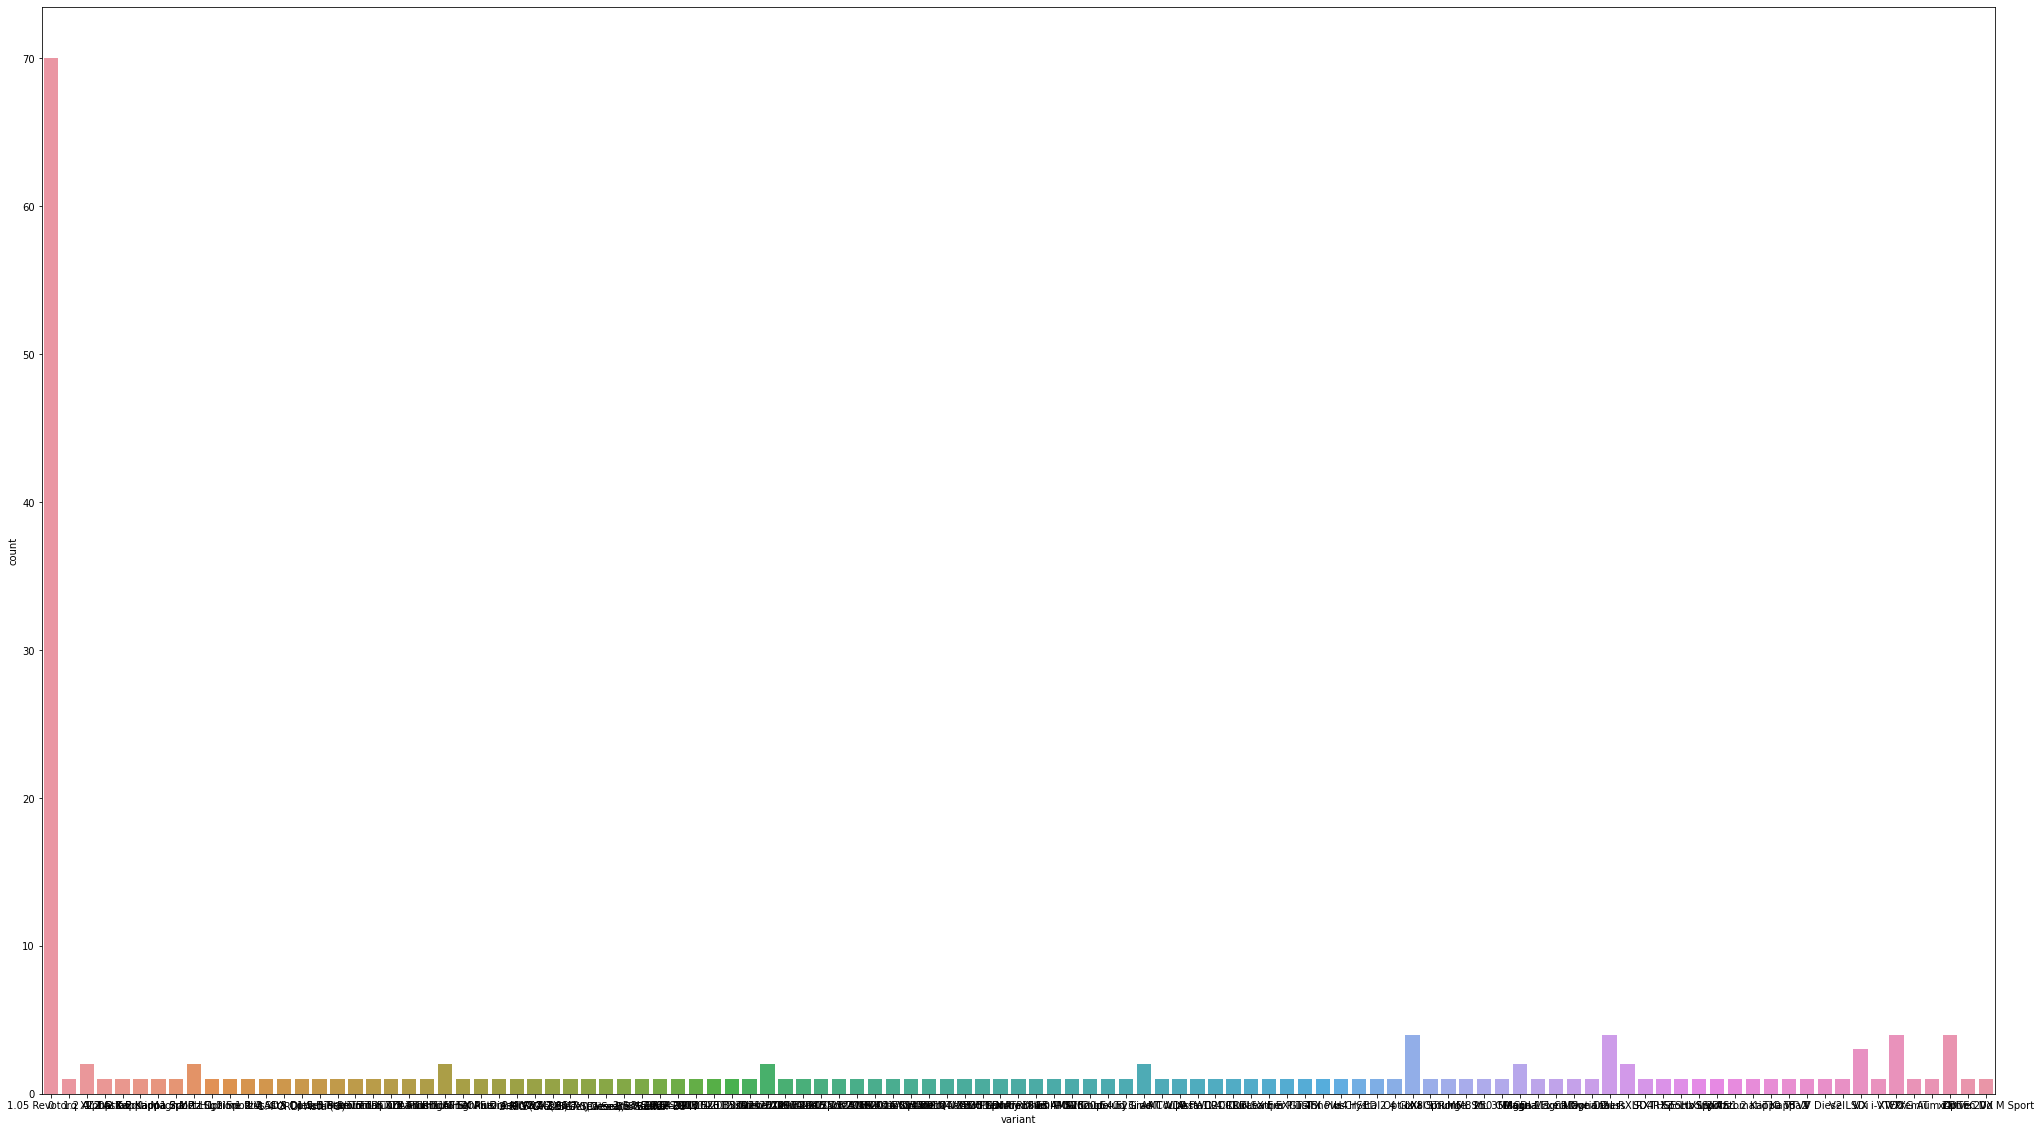

In [29]:
plt.figure(figsize=(35,20))
print(df['variant'].value_counts())
print("-"*70)
sns.countplot(df['variant'].sort_values())

In [30]:
 #encoding fuel column
df.replace({'fueltype':{'Diesel':0,'Petrol':1,'CNG & Hybrids':2,'0':3}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1,'0':2}}, inplace=True)


In [31]:
df.head()

,Brand,fueltype,mileage,model,price,transmission,variant,year
0,Audi,0,70500,A4,2650000,1,35 TDI Premium + Sunroof,2015
1,Audi,0,0,A6,2295000,2,0,2018
2,Audi,0,0,Q3,530000,2,0,2016
3,BMW,0,0,3 Series,32000,2,2.5 GX (Diesel) 8 Seater BS IV,2013
4,BMW,0,30808,3 Series,140999,0,2.5 GX (Diesel) 8 Seater,2014


In [32]:
X=df.drop(['Brand','price','variant','model'],axis=1)
Y=df['price']

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
# loading linear regression model
lin_reg_model=LinearRegression()

In [35]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [36]:
predicted_values=lin_reg_model.predict(X_train)

In [37]:
# R square error
error_score=metrics.r2_score(Y_train,predicted_values)
print("R square error:",error_score)

R square error: 0.1912408054332838


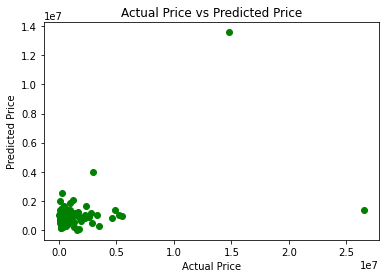

In [38]:
plt.scatter(Y_train,predicted_values,c='g')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [39]:
predict=lin_reg_model.predict(X_test)

In [40]:
predict

array([1337021.75443433,  838895.63765552,  351463.48434735,
        838925.4380242 , 1024953.59087808, 1025013.19161544,
       1024834.38940336,  122874.66082815, 1337021.75443433,
        838806.23654948,   75270.80665244,   88388.94975967,
        655018.52077439, 1337021.75443433, 1265214.40123334,
        838925.4380242 , 1284791.54138327,  838836.03691816,
       1337021.75443433,  838687.03507476,  838925.4380242 ,
        899032.78165042,  838836.03691816, 1652775.38530487,
        475583.90173019,  892090.0135835 ,  401683.64187023,
        838985.03876156, 1024864.18977204, 1337021.75443433,
        839014.83913024,  599569.36223632, 1092799.66236881,
       1025013.19161544,  271630.77011906,  838895.63765552,
       1337021.75443433, 1024983.39124676, 1337021.75443433,
       1024744.98829732])

In [41]:
lasso_reg_model=Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [42]:
predicted_values1=lasso_reg_model.predict(X_train)

In [43]:
# R square error
error_score2=metrics.r2_score(Y_train,predicted_values1)
print("R square error:",error_score2)

R square error: 0.1912408054327901


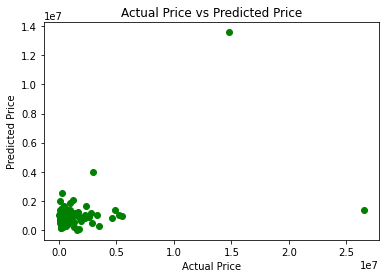

In [44]:
plt.scatter(Y_train,predicted_values1,c='g')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [45]:
predicted_values1

array([ 9.81428692e+05,  4.95386213e+05,  1.33701937e+06,  1.33701937e+06,
        1.33701937e+06,  1.20521055e+06,  1.02492271e+06,  1.98045487e+06,
        9.01506598e+05,  8.98673826e+05,  1.24517160e+06,  1.02507171e+06,
        8.50887492e+05,  8.38896135e+05,  8.98971821e+05,  1.02471411e+06,
        6.67604327e+05,  8.39015333e+05,  6.01461777e+05,  8.38866336e+05,
        1.10717584e+06,  9.31028523e+05,  1.14480589e+06,  1.02495251e+06,
        1.02492271e+06,  6.14863829e+05,  6.02660608e+05,  1.33701937e+06,
        1.33701937e+06,  1.35914315e+07,  6.73791272e+05,  9.21549763e+05,
        2.52798385e+06,  4.31508137e+05,  8.38985533e+05,  1.33701937e+06,
        1.09291913e+06,  6.61518620e+05,  8.49619878e+05,  5.51301880e+05,
        7.68163280e+05,  8.38836536e+05,  7.41575970e+05,  7.77468297e+05,
        8.99061219e+05,  9.18880870e+05,  5.63112789e+05,  5.18214924e+05,
        4.19278385e+05,  1.33701937e+06,  1.02492271e+06,  1.02544848e+06,
        8.41627669e+05,  

In [50]:
# checking mean square error, RMSE

print("Mean square error",mean_squared_error(Y_test,predict))
print("RMSE",np.sqrt(mean_squared_error(Y_test,predict)))

Mean square error 630378656171.4229
RMSE 793963.8884555284


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [53]:
# Implementing random forest regressor

#calling a object
rf=RandomForestRegressor()
#model fitting
rf.fit(X_train,Y_train)
#predicting the model
y_pred=rf.predict(X_test)

In [55]:
print("Train score",rf.score(X_train,Y_train))

Train score 0.26456305166898675


In [57]:


print("Mean square error",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

Mean square error 962151488171.7551
RMSE 980893.2093616283


In [61]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor()

# fit the regressor with X and Y data
regressor.fit(X,Y)


DecisionTreeRegressor()

In [62]:
# predicting a new value
y_pred = regressor.predict(X_test)

In [63]:
# checking MSE and RMSE

print("Mean square error",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))


Mean square error 306531212443.76025
RMSE 553652.6098951943


In [64]:
 #Randomizedsearchcv

random_parameters={'n_estimators':[int(x) for x in np.linspace(100,400,num=12)],
                  'max_features':['auto','sqrt','log2'],
                  'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
                  'min_samples_split':[2,5,10,15,100],
                  'min_samples_leaf':[1,2,5,10]}

In [65]:
random_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_parameters,n_iter=10,scoring="neg_mean_squared_error",
                            cv=10,verbose=2,random_state=42,n_jobs=1)
random_rf.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=318; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=3

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=181; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=181; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=372; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 127, 154, 181,
                                                         209, 236, 263, 290,
                                                         318, 345, 372, 400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
random_rf.best_params_

{'n_estimators': 127,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [68]:
pred_y=random_rf.predict(X_test)
pred_y

array([1079134.07430144,  930250.55388736,  862257.59595561,
        930250.55388736,  963977.46522513,  963977.46522513,
        953836.36085038,  919186.80626237, 1079134.07430144,
        920109.44951261,  868158.67801555,  910578.43190793,
        915121.80142748, 1079134.07430144, 1074146.42621632,
        930250.55388736,  969041.11815618,  920109.44951261,
       1079134.07430144,  920109.44951261,  930250.55388736,
        938858.9282418 ,  920109.44951261, 1084197.7272325 ,
       1025735.04098425, 1014744.24122039,  899587.63214408,
        938858.9282418 ,  953836.36085038, 1079134.07430144,
        938858.9282418 ,  925262.90580223,  899497.82878551,
        963977.46522513,  865860.7208063 ,  930250.55388736,
       1079134.07430144,  963977.46522513, 1079134.07430144,
        953836.36085038])

In [71]:
print("Mean square error",mean_squared_error(Y_test,pred_y))
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred_y)))


Mean square error 549386585946.4761
RMSE 741206.1696629866


In [72]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [76]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [77]:
regressor.score(X_train,Y_train)

0.30034695214732665

In [79]:
tuned_pred=regressor.predict(X_test)

In [80]:
tuned_pred

array([1959752.47368421,  475000.        ,  140999.        ,
        340000.        ,  717500.        , 1548000.        ,
       1100000.        ,  841577.66666667, 1959752.47368421,
        670500.        ,  161000.        , 1750000.        ,
       1350000.        , 1959752.47368421,  285000.        ,
        340000.        ,  565000.        ,  366500.        ,
       1959752.47368421,  125000.        ,  340000.        ,
       1709999.        ,  366500.        ,  230000.        ,
        100000.        , 1100000.        ,  550000.        ,
       1117750.        ,  380000.        , 1959752.47368421,
       1197500.        ,  565000.        ,  375000.        ,
       1548000.        ,  311000.        ,  475000.        ,
       1959752.47368421,  215000.        , 1959752.47368421,
        560000.        ])

In [81]:
print("Mean square error",mean_squared_error(Y_test,tuned_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,tuned_pred)))


Mean square error 989538414315.5891
RMSE 994755.4545291968


Observation: The best fit model is Random Forest which has less mean Squared error...
Future Scope:- Here we have only less features  and the large amount of data  is not availabe so the accuracy is low.